<a href="https://colab.research.google.com/github/Sreeja0522/Image-Recognition-with-MNIST-Dataset/blob/main/fixing_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train_full = x_train_full.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.1, random_state=42
)

model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1),
                  kernel_regularizer=regularizers.l2(0.0005)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.Flatten(),
    layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    verbose=2
)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy After Overfitting Fix: {test_acc:.4f}")

Epoch 1/50
422/422 - 92s - 219ms/step - accuracy: 0.9864 - loss: 0.1811 - val_accuracy: 0.9908 - val_loss: 0.1493
Epoch 2/50
422/422 - 108s - 255ms/step - accuracy: 0.9883 - loss: 0.1433 - val_accuracy: 0.9907 - val_loss: 0.1329
Epoch 3/50
422/422 - 57s - 134ms/step - accuracy: 0.9885 - loss: 0.1381 - val_accuracy: 0.9872 - val_loss: 0.1379
Epoch 4/50
422/422 - 57s - 135ms/step - accuracy: 0.9863 - loss: 0.1453 - val_accuracy: 0.9905 - val_loss: 0.1332
Epoch 5/50
422/422 - 58s - 136ms/step - accuracy: 0.9852 - loss: 0.1524 - val_accuracy: 0.9897 - val_loss: 0.1416
Epoch 6/50
422/422 - 82s - 194ms/step - accuracy: 0.9860 - loss: 0.1503 - val_accuracy: 0.9890 - val_loss: 0.1441
Epoch 7/50
422/422 - 57s - 134ms/step - accuracy: 0.9854 - loss: 0.1561 - val_accuracy: 0.9840 - val_loss: 0.1615
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9874 - loss: 0.1397

Test Accuracy After Overfitting Fix: 0.9905


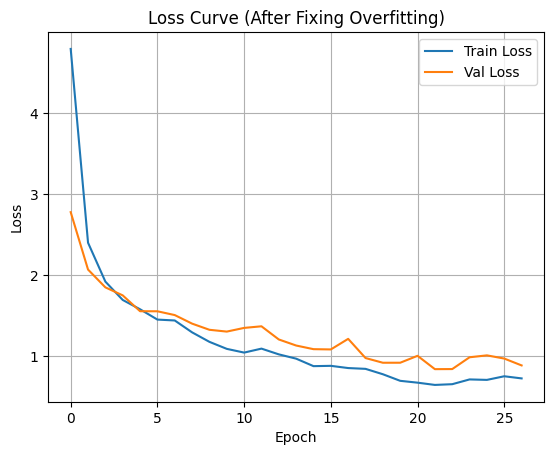

In [3]:


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve (After Fixing Overfitting)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


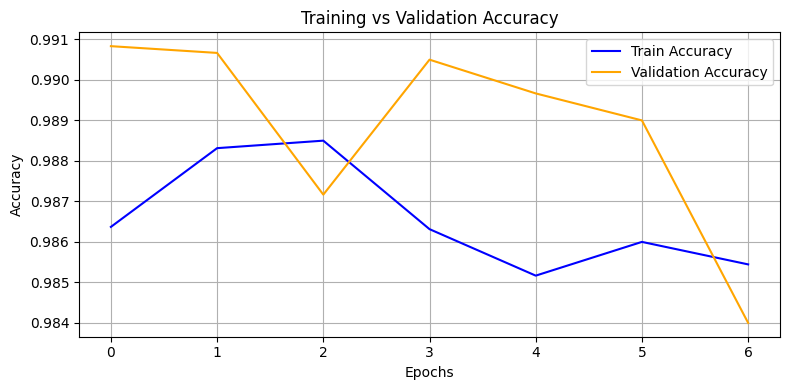

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
